# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [136]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [137]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [138]:
# Load the dataset
emp_data = pd.read_csv('Employee_data.csv')

In [139]:
# Check the first few entries
emp_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [140]:
# Inspect the shape of the dataset
emp_data.shape

(74610, 24)

In [141]:
# Inspect the different columns in the dataset
emp_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [142]:
# Check the summary of the dataset
emp_data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


### **1.3 Check the data type of columns**

In [143]:
# Check the info to see the types of the feature variables and the null values present
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [144]:
# Check the number of missing values in each column
emp_data.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [145]:
# Check the percentage of missing values in each column
emp_data.isnull().sum()/len(emp_data)*100

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [146]:
# Handle the missing value rows in the column
emp_data['Distance from Home'].fillna(emp_data['Distance from Home'].median(), inplace=True)
emp_data['Company Tenure (In Months)'].fillna(emp_data['Company Tenure (In Months)'].median(), inplace=True)

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [147]:
# Check the percentage of remaining data after missing values are removed
emp_data.isnull().sum()/len(emp_data)*100

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [148]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def display_unique_categories(df, cat_cols):
    for col in cat_cols:
        print(f"Column: {col}")
        print(df[col].unique())
        print("-" * 40)

In [149]:
# Check the data
cat_cols = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level',
           'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 
           'Company Reputation', 'Employee Recognition', 'Attrition']

display_unique_categories(emp_data, cat_cols)

Column: Gender
['Male' 'Female']
----------------------------------------
Column: Job Role
['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
----------------------------------------
Column: Work-Life Balance
['Excellent' 'Poor' 'Good' 'Fair']
----------------------------------------
Column: Job Satisfaction
['Medium' 'High' 'Very High' 'Low']
----------------------------------------
Column: Performance Rating
['Average' 'Low' 'High' 'Below Average']
----------------------------------------
Column: Overtime
['No' 'Yes']
----------------------------------------
Column: Education Level
['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
----------------------------------------
Column: Marital Status
['Married' 'Divorced' 'Single']
----------------------------------------
Column: Job Level
['Mid' 'Senior' 'Entry']
----------------------------------------
Column: Company Size
['Medium' 'Small' 'Large']
----------------------------------------
Column: 

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [150]:
# Drop redundant columns which are not required for modelling
#Dropping column 'Overtime' as we have another column 'Work-Life Balance'.
emp_data.drop('Overtime', axis=1, inplace=True)

In [151]:
# Check first few rows of data
emp_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [152]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [153]:
# Put all the feature variables in X
X = emp_data.drop('Attrition', axis=1)
# Put the target variable in y
y = emp_data['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [154]:
# Split the data into 70% train data and 30% validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [155]:
# Select numerical columns
nums_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
nums_cols

Index(['Employee ID', 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)'],
      dtype='object')

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

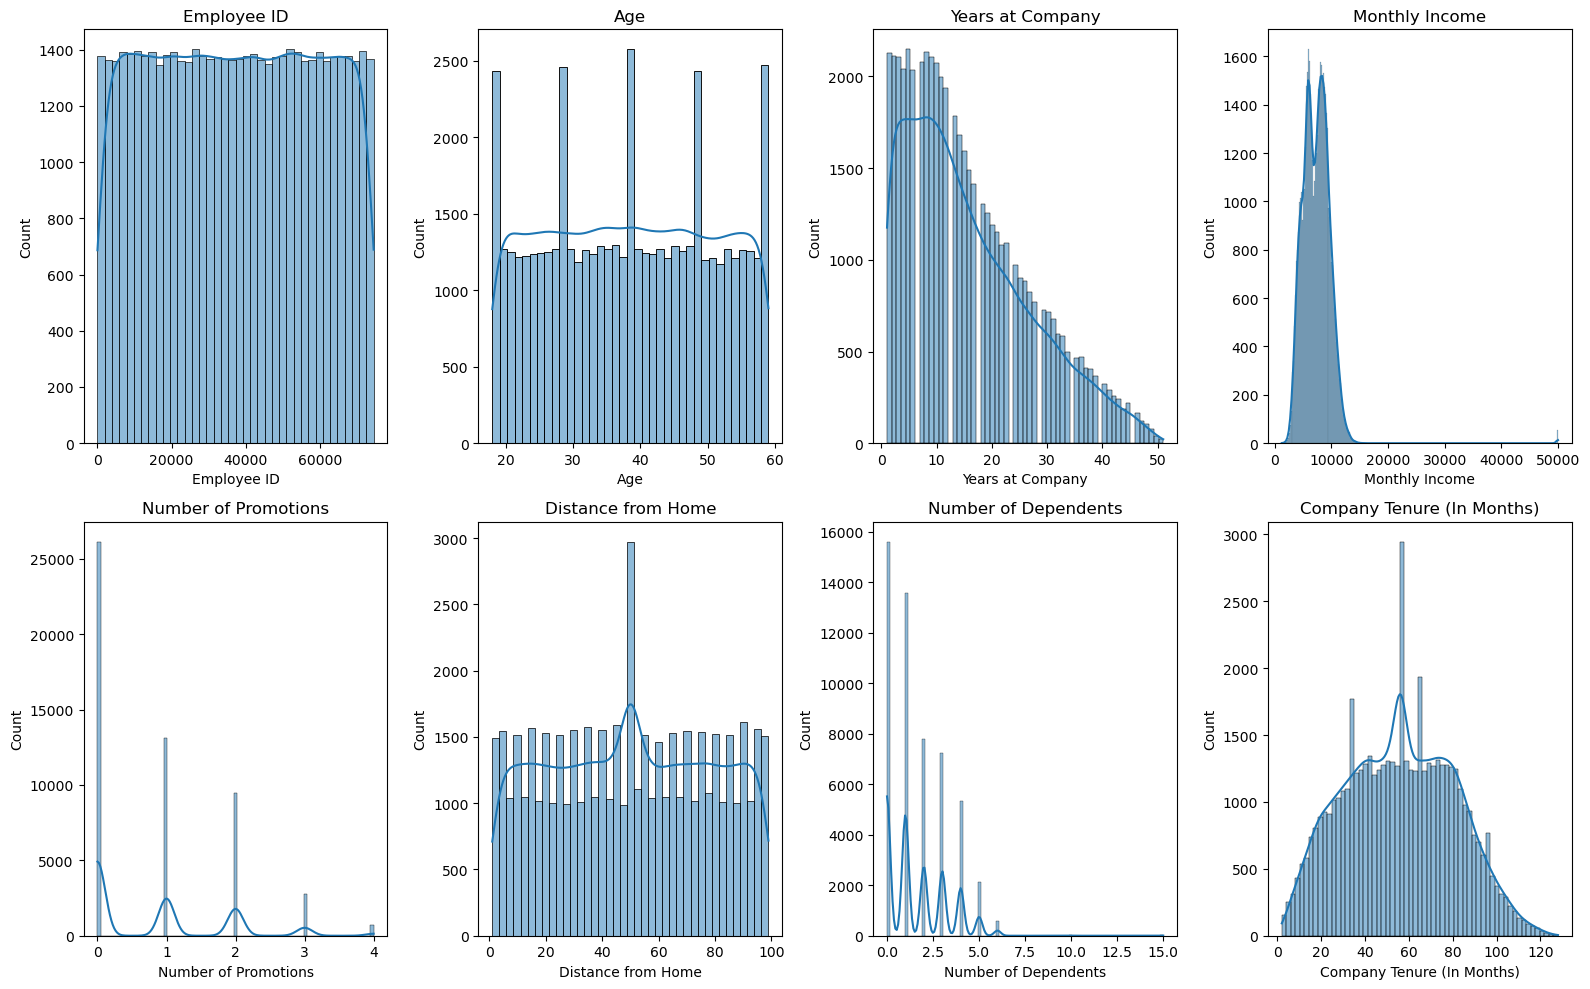

In [156]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
for idx, col in enumerate(nums_cols): 
    plt.subplot(2, 4, idx + 1)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)
    plt.tight_layout()
plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

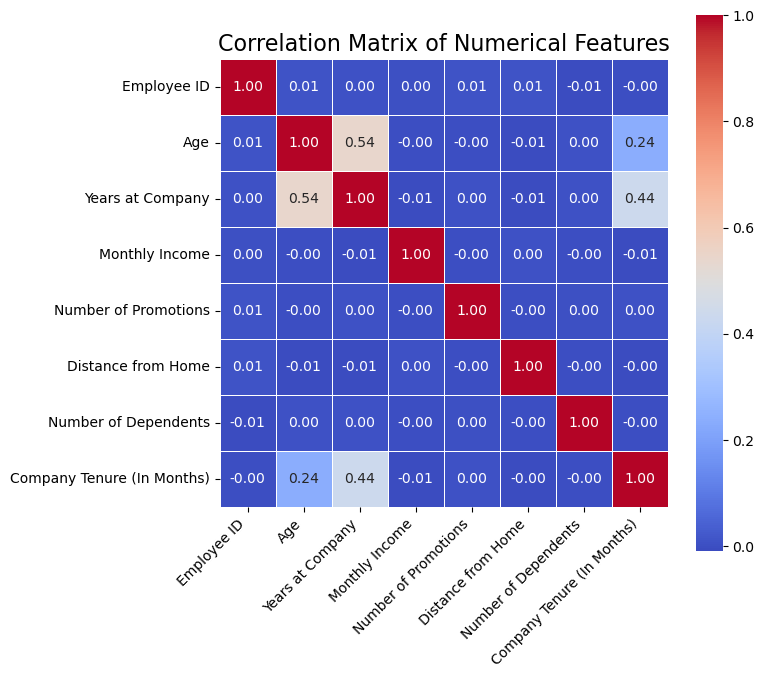

In [157]:
# Create correlation matrix for numerical columns
corr_mat = X_train[nums_cols].corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(8, 8))  # Larger plot size
sns.heatmap(corr_mat, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5, 
            square=True, 
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

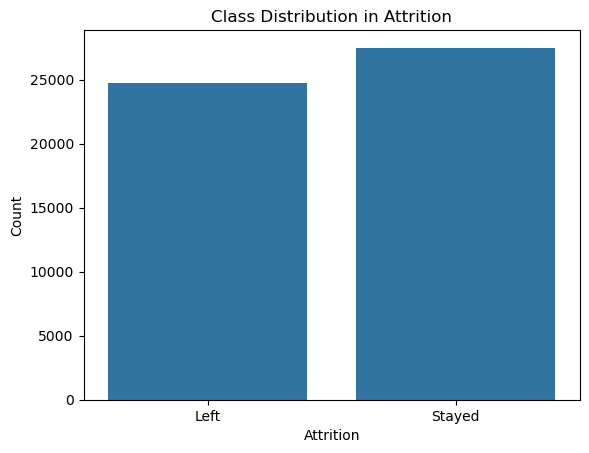

In [158]:
# Plot a bar chart to check class balance
sns.countplot(x=y_train)
plt.title("Class Distribution in Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

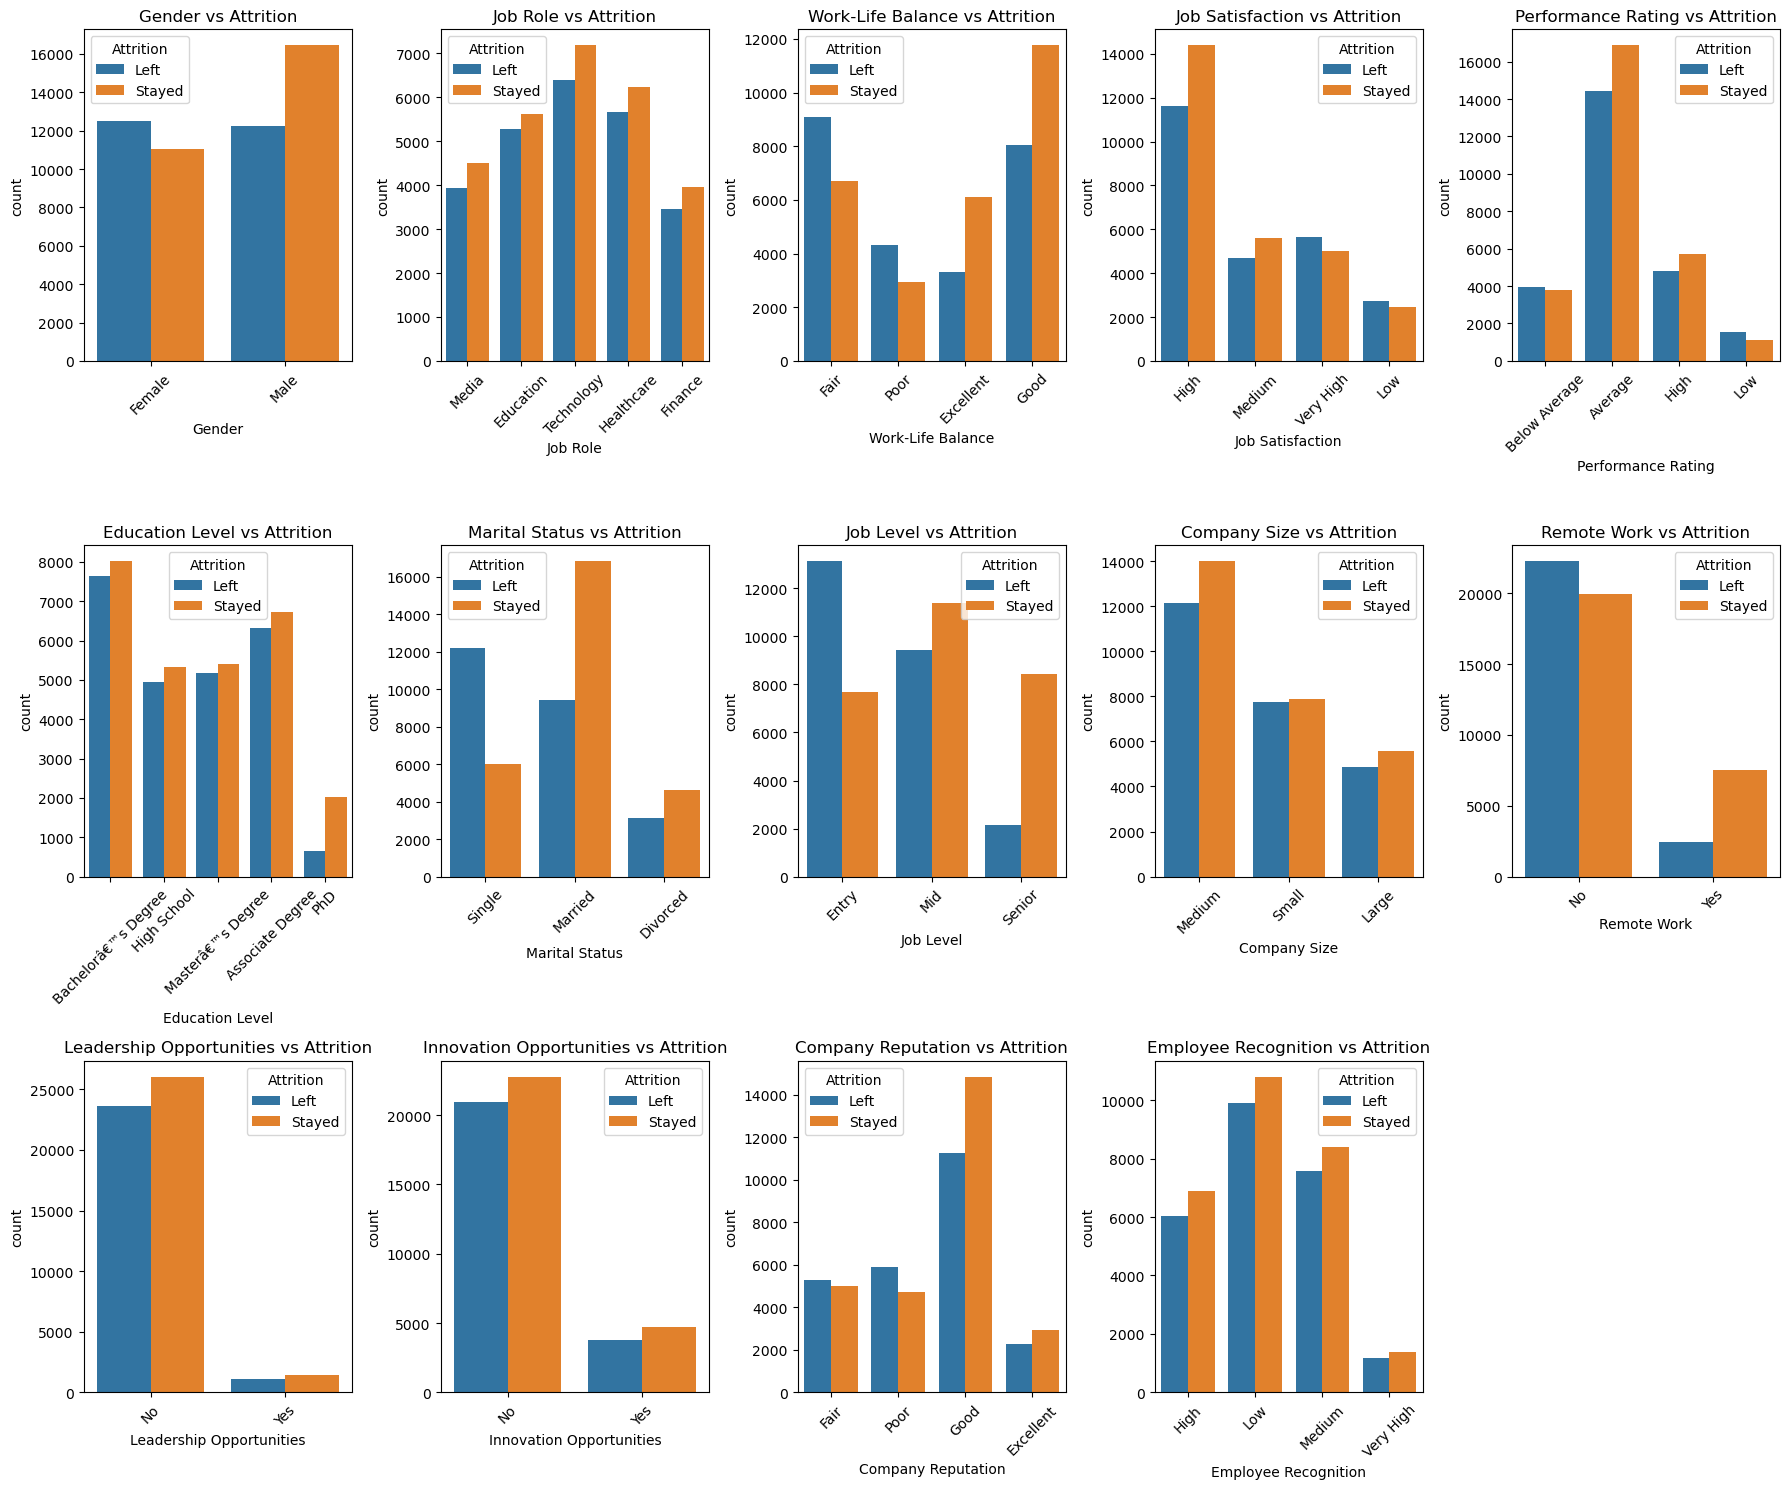

In [159]:
# Plot distribution for each categorical column with target variable
cat_cols = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Education Level',
            'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 
            'Company Reputation', 'Employee Recognition']

plt.figure(figsize=(18, 15))
for idx, col in enumerate(cat_cols):
    plt.subplot(3, 5, idx + 1)
    sns.countplot(data=X_train, x=col, hue=y_train)
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [160]:
# Select numerical columns


5.1.2 Plot distribution of numerical columns

In [161]:
# Plot all the numerical columns to understand their distribution


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

In [162]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [163]:
# Plot a bar chart to check class balance


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

In [164]:
# Plot distribution for each categorical column with target variable


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [165]:
# Check the categorical columns
X_train.select_dtypes('object').columns

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Education Level', 'Marital Status', 'Job Level',
       'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [166]:
# Create dummy variables using the 'get_dummies' for independent columns
# Add the results to the master DataFrame
bin_cols = ['Remote Work', 'Leadership Opportunities', 'Innovation Opportunities']
for col in bin_cols:
    X_train[col] = X_train[col].map({'Yes': 1, 'No': 0})

mul_cat_col = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
               'Performance Rating', 'Education Level', 'Marital Status',
               'Job Level', 'Company Size', 'Company Reputation',
               'Employee Recognition']
X_train = pd.get_dummies(X_train, columns=mul_cat_col, drop_first=True).astype(int)

Now, drop the original categorical columns and check the DataFrame

In [167]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52227 entries, 60704 to 38408
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Employee ID                          52227 non-null  int32
 1   Age                                  52227 non-null  int32
 2   Years at Company                     52227 non-null  int32
 3   Monthly Income                       52227 non-null  int32
 4   Number of Promotions                 52227 non-null  int32
 5   Distance from Home                   52227 non-null  int32
 6   Number of Dependents                 52227 non-null  int32
 7   Company Tenure (In Months)           52227 non-null  int32
 8   Remote Work                          52227 non-null  int32
 9   Leadership Opportunities             52227 non-null  int32
 10  Innovation Opportunities             52227 non-null  int32
 11  Gender_Male                          52227 non-null  in

In [168]:
# Drop the original categorical columns and check the DataFrame
X_train.head()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Remote Work,Leadership Opportunities,...,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
60704,59531,33,23,6379,0,40,2,39,0,0,...,0,0,1,0,1,0,0,0,0,0
16163,23769,52,3,3776,1,93,2,27,0,0,...,1,0,0,1,0,0,1,1,0,0
25709,7634,36,20,12194,0,21,2,45,0,0,...,1,0,1,0,0,1,0,0,1,0
4354,8742,46,7,7591,0,96,1,21,0,0,...,0,0,1,0,0,1,0,0,0,0
49862,74200,35,26,5028,1,28,0,42,0,0,...,0,0,0,1,0,1,0,1,0,0


6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [169]:
# Create dummy variables using the 'get_dummies' for independent columns
# Add the results to the master DataFrame
bin_cols = ['Remote Work', 'Leadership Opportunities', 'Innovation Opportunities']
for col in bin_cols:
    X_test[col] = X_test[col].map({'Yes': 1, 'No': 0})

mul_cat_col = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
               'Performance Rating', 'Education Level', 'Marital Status',
               'Job Level', 'Company Size', 'Company Reputation',
               'Employee Recognition']
X_test = pd.get_dummies(X_test, columns=mul_cat_col, drop_first=True).astype(int)

Now, drop the original categorical columns and check the DataFrame

In [170]:
# Drop categorical columns and check the DataFrame
X_test.head()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Remote Work,Leadership Opportunities,...,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
61539,56957,58,43,10970,0,53,0,57,1,0,...,0,1,1,0,0,1,0,0,1,0
42583,26041,18,6,9242,0,31,3,63,0,0,...,1,0,0,0,0,1,0,0,0,0
55936,4435,49,15,5171,0,55,3,47,0,0,...,0,0,1,0,0,1,0,0,1,0
66035,38945,46,18,8151,2,42,0,30,0,0,...,1,0,0,0,0,1,0,0,1,0
23119,69132,43,22,8304,1,50,2,76,0,0,...,0,0,1,0,0,0,1,0,1,0


6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [171]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_df = pd.DataFrame({'y_train': y_train, 'y_test': y_test})
y_df

,y_train,y_test
0,NaN,Stayed
1,Stayed,NaN
2,Stayed,NaN
3,NaN,Stayed
4,Stayed,NaN
...,...,...
74605,Left,NaN
74606,Stayed,NaN
74607,NaN,Left
74608,NaN,Stayed


6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [172]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train = y_train.map({'Left': 0, 'Stayed': 1})

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [173]:
# Create dummy variables using the 'get_dummies' for dependent column
y_test = y_test.map({'Left': 0, 'Stayed': 1})

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [ ]:
# Drop redundant columns from both train and validation


### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [174]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [175]:
# Scale the numeric features present in the training set
scaler = StandardScaler()
X_train[['Age','Years at Company','Monthly Income','Number of Promotions', 'Distance from Home', 'Number of Dependents', 
         'Company Tenure (In Months)']] = scaler.fit_transform(X_train[['Age','Years at Company','Monthly Income','Number of Promotions', 'Distance from Home', 'Number of Dependents', 
         'Company Tenure (In Months)']])

# Scale the numerical features present in the validation set
X_test[['Age','Years at Company','Monthly Income','Number of Promotions', 'Distance from Home', 'Number of Dependents', 
         'Company Tenure (In Months)']] = scaler.transform(X_test[['Age','Years at Company','Monthly Income','Number of Promotions', 'Distance from Home', 'Number of Dependents', 
         'Company Tenure (In Months)']])

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [176]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [177]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE

lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [178]:
# Display the features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Employee ID', False, 27),
 ('Age', False, 11),
 ('Years at Company', False, 8),
 ('Monthly Income', False, 21),
 ('Number of Promotions', False, 4),
 ('Distance from Home', False, 3),
 ('Number of Dependents', False, 5),
 ('Company Tenure (In Months)', False, 24),
 ('Remote Work', True, 1),
 ('Leadership Opportunities', False, 6),
 ('Innovation Opportunities', False, 9),
 ('Gender_Male', True, 1),
 ('Job Role_Finance', False, 12),
 ('Job Role_Healthcare', False, 15),
 ('Job Role_Media', False, 13),
 ('Job Role_Technology', False, 14),
 ('Work-Life Balance_Fair', True, 1),
 ('Work-Life Balance_Good', True, 1),
 ('Work-Life Balance_Poor', True, 1),
 ('Job Satisfaction_Low', True, 1),
 ('Job Satisfaction_Medium', False, 17),
 ('Job Satisfaction_Very High', True, 1),
 ('Performance Rating_Below Average', True, 1),
 ('Performance Rating_High', False, 26),
 ('Performance Rating_Low', True, 1),
 ('Education Level_Bachelorâ€™s Degree', False, 22),
 ('Education Level_High School', False, 23)

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [179]:
# Put columns selected by RFE into variable 'col'
col = X_train.columns[rfe.support_]

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [180]:
# Select only the columns selected by RFE
X_train_rfe = X_train[col]

In [181]:
# View the training data
X_train_rfe.head()

,Remote Work,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Company Reputation_Fair,Company Reputation_Poor
60704,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
16163,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1
25709,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4354,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
49862,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [182]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_rfe)

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [183]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
logr = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
logr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                52227
Model:                            GLM   Df Residuals:                    52211
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26485.
Date:                Fri, 23 May 2025   Deviance:                       52969.
Time:                        18:39:31   Pearson chi2:                 4.90e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3088
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.3250      0.034      9.572      0.000       0.258       0.392
Remote Work                          1.7039      0.030     56.293      0.000       1.645       1.763
Gender_Male                          0.5899      0.022     27.331      0.000       0.548       0.632
Work-Life Balance_Fair              -1.2740      0.032    -39.218      0.000      -1.338      -1.210
Work-Life Balance_Good              -0.3027      0.031     -9.823      0.000      -0.363      -0.242
Work-Life Balance_Poor              -1.4303      0.039    -36.627      0.000      -1.507      -1.354
Job Satisfaction_Low                -0.4602      0.036    -12.695      0.000      -0.531      -0.389
Job Satisfaction_Very High          -0.4738      0.027    -17.656      0.000      -0.526      -0.421
Performance Rating_Below Average    -0.3192      0.030    -10.628      0.000      -0.378      -0.260
Performance Rating_Low              -0.5712      0.049    -11.591      0.000      -0.668      -0.475
Education Level_PhD                  1.5157      0.054     27.903      0.000       1.409       1.622
Marital Status_Single               -1.7007      0.024    -71.006      0.000      -1.748      -1.654
Job Level_Mid                        0.9514      0.024     40.464      0.000       0.905       0.998
Job Level_Senior                     2.5034      0.034     74.375      0.000       2.437       2.569
Company Reputation_Fair             -0.4868      0.028    -17.559      0.000      -0.541      -0.432
Company Reputation_Poor             -0.7219      0.028    -26.122      0.000      -0.776      -0.668
====================================================================================================
"""

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [184]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [185]:
X_train = X_train_sm.drop('const', axis=1)

In [186]:
# Make a VIF DataFrame for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Work-Life Balance_Good,1.99
1,Gender_Male,1.96
2,Work-Life Balance_Fair,1.78
11,Job Level_Mid,1.76
10,Marital Status_Single,1.46
12,Job Level_Senior,1.38
4,Work-Life Balance_Poor,1.36
13,Company Reputation_Fair,1.28
14,Company Reputation_Poor,1.28
6,Job Satisfaction_Very High,1.25


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [187]:
# Predict the probabilities on the training set
y_train_pred = logr.predict(X_train_sm)

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [188]:
# Reshape it into an array
y_train_pred = y_train_pred.values.reshape(-1)

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [189]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
y_train_pred_df = pd.DataFrame({'Act_Attrition': y_train, 'Pred_Attrition':y_train_pred})
y_train_pred_df['Employee ID'] = y_train.index
y_train_pred_df.head()

,Act_Attrition,Pred_Attrition,Employee ID
60704,0,0.030599,60704
16163,0,0.120625,16163
25709,1,0.781841,25709
4354,0,0.462873,4354
49862,0,0.411196,49862


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [190]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
y_train_pred_df['Predicted'] = y_train_pred_df['Pred_Attrition'].apply(lambda x: 1 if x>0.5 else 0)
y_train_pred_df.head()

,Act_Attrition,Pred_Attrition,Employee ID,Predicted
60704,0,0.030599,60704,0
16163,0,0.120625,16163,0
25709,1,0.781841,25709,1
4354,0,0.462873,4354,0
49862,0,0.411196,49862,0


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [191]:
# Import metrics from sklearn for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Check the overall accuracy
accuracy_score(y_train_pred_df.Act_Attrition, y_train_pred_df.Predicted)

0.7399620885748751

7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [192]:
# Create confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_df.Act_Attrition, y_train_pred_df.Predicted)
confusion

array([[17572,  7160],
       [ 6421, 21074]], dtype=int64)

7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [193]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion[1,1]   # true positive
TN = confusion[0,0]   # true negatives
FP = confusion[0,1]   # false positives
FN = confusion[1,0]   # false negatives

7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [194]:
# Calculate sensitivity
sensitivity = TP/float(TP+FN)
sensitivity

0.7664666302964175

In [195]:
# Calculate specificity
specificity = TN/float(TN+FP)
specificity

0.710496522723597

7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [196]:
# Calculate precision
precision = TP/float(TP+FP)
precision

0.7464050435644967

In [197]:
# Calculate recall
recall = TP/float(TP+FN)
recall

0.7664666302964175

### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [198]:
# Define ROC function
def draw_roc(actual, prob):
    fpr, tpr, threshold = metrics.roc_curve(actual, prob, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label = 'ROC_curve(area=%0.2f)' %auc_score)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

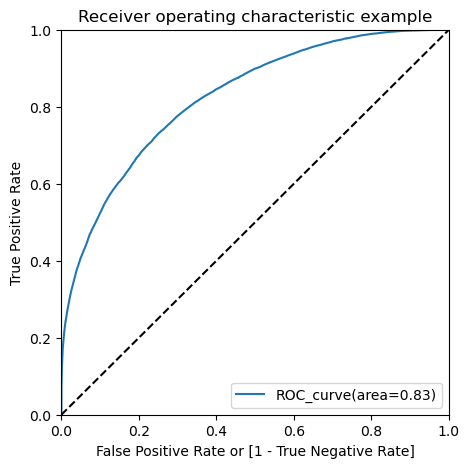

In [199]:
# Call the ROC function
draw_roc(y_train_pred_df.Act_Attrition, y_train_pred_df.Pred_Attrition)

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [200]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i] = y_train_pred_df['Pred_Attrition'].map(lambda x: 1 if x>i else 0)
y_train_pred_df.head()

,Act_Attrition,Pred_Attrition,Employee ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
60704,0,0.030599,60704,0,1,0,0,0,0,0,0,0,0,0
16163,0,0.120625,16163,0,1,1,0,0,0,0,0,0,0,0
25709,1,0.781841,25709,1,1,1,1,1,1,1,1,1,0,0
4354,0,0.462873,4354,0,1,1,1,1,1,0,0,0,0,0
49862,0,0.411196,49862,0,1,1,1,1,1,0,0,0,0,0


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [201]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df = pd.DataFrame(columns=['Prob', 'accuracy', 'sensitivity', 'specificity'])

nums = [0.0, 0.1, 0.2, 0.3,	0.4, 0.5, 0.6, 0.7,	0.8, 0.9]
for i in nums:
    confusion = metrics.confusion_matrix(y_train_pred_df.Act_Attrition, y_train_pred_df[i])
    accuracy = (confusion[0,0]+confusion[1,1])/(confusion[0,0]+confusion[1,1]+confusion[1,0]+confusion[0,1])
    sensitivity = confusion[1,1]/(confusion[1,1]+confusion[1,0])
    specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity] 
cutoff_df

,Prob,accuracy,sensitivity,specificity
0.0,0.0,0.526452,1.000000,0.000000
0.1,0.1,0.588029,0.995890,0.134603
0.2,0.2,0.661478,0.962029,0.327349
0.3,0.3,0.703908,0.909947,0.474850
0.4,0.4,0.729929,0.840298,0.607230
0.5,0.5,0.739962,0.766467,0.710497
0.6,0.6,0.732456,0.664303,0.808224
0.7,0.7,0.705555,0.534970,0.895197
0.8,0.8,0.662225,0.401455,0.952127
0.9,0.9,0.582151,0.212657,0.992924


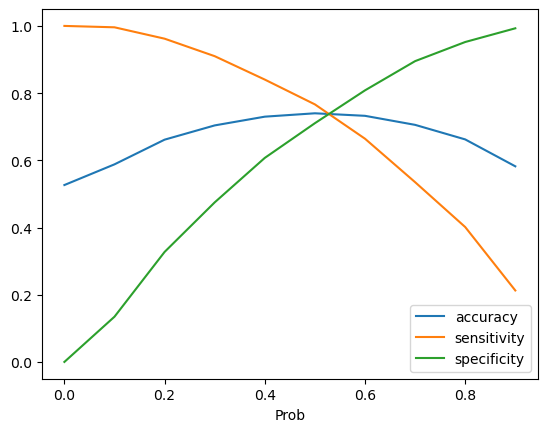

In [202]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df.plot.line(x='Prob', y=['accuracy','sensitivity','specificity'])
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [203]:
# Create a column for final prediction based on the optimal cutoff
y_train_pred_df['Final_Prediction'] = y_train_pred_df['Pred_Attrition'].apply(lambda x: 1 if x>0.5 else 0)
y_train_pred_df.head()

,Act_Attrition,Pred_Attrition,Employee ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Prediction
60704,0,0.030599,60704,0,1,0,0,0,0,0,0,0,0,0,0
16163,0,0.120625,16163,0,1,1,0,0,0,0,0,0,0,0,0
25709,1,0.781841,25709,1,1,1,1,1,1,1,1,1,0,0,1
4354,0,0.462873,4354,0,1,1,1,1,1,0,0,0,0,0,0
49862,0,0.411196,49862,0,1,1,1,1,1,0,0,0,0,0,0


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [204]:
# Calculate the accuracy
accuracy_score(y_train_pred_df.Act_Attrition, y_train_pred_df.Final_Prediction)

0.7399620885748751

7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [205]:
# Create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_df.Act_Attrition, y_train_pred_df.Final_Prediction)
confusion2

array([[17572,  7160],
       [ 6421, 21074]], dtype=int64)

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [206]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion2[1,1]   # true positive
TN = confusion2[0,0]   # true negatives
FP = confusion2[0,1]   # false positives
FN = confusion2[1,0]   # false negatives

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [207]:
# Calculate Sensitivity
sensitivity = TP/float(TP+FN)
sensitivity 

0.7664666302964175

In [208]:
# Calculate Specificity
specificity = TN/float(TN+FP)
specificity

0.710496522723597

7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [209]:
# Calculate Precision
precision = TP/float(TP+FP)
precision

0.7464050435644967

In [210]:
# Calculate Recall
recall = TP/float(TP+FN)
recall

0.7664666302964175

**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [211]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [212]:
# Check actual and predicted values from initial model
y_train_pred_df.Act_Attrition, y_train_pred_df.Predicted

(60704    0
 16163    0
 25709    1
 4354     0
 49862    0
         ..
 14260    1
 63370    1
 65615    1
 56088    1
 38408    1
 Name: Act_Attrition, Length: 52227, dtype: int64,
 60704    0
 16163    0
 25709    1
 4354     0
 49862    0
         ..
 14260    1
 63370    1
 65615    0
 56088    1
 38408    1
 Name: Predicted, Length: 52227, dtype: int64)

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

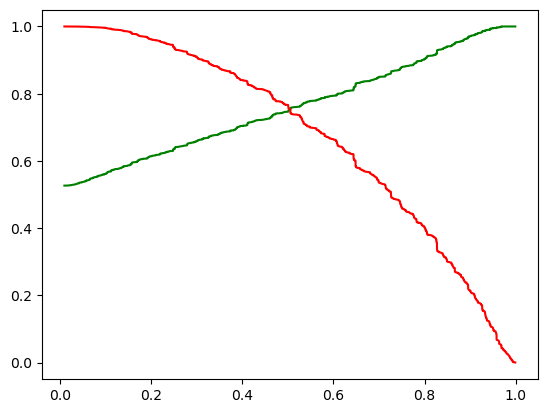

In [213]:
# Plot precision-recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_df.Act_Attrition, y_train_pred_df.Pred_Attrition)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [214]:
# Select the relevant features for validation set
X_test_rfe = X_test[col]

In [215]:
X_test_rfe.columns

Index(['Remote Work', 'Gender_Male', 'Work-Life Balance_Fair',
       'Work-Life Balance_Good', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Company Reputation_Fair',
       'Company Reputation_Poor'],
      dtype='object')

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [216]:
# Add constant to X_validation
X_test_sm = sm.add_constant(X_test_rfe)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [217]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = logr.predict(X_test_sm)
# View predictions
y_validation_pred[:10]

61539    0.986814
42583    0.725859
55936    0.175269
66035    0.384308
23119    0.058327
38563    0.149511
50307    0.695283
10397    0.188094
22702    0.348899
41544    0.826877
dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [218]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred)

# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_test)

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
final_df = pd.concat([predicted_probability, actual], axis=1).reset_index(drop=True)

In [219]:
final_df.head()

,0,Attrition
0,0.986814,1
1,0.725859,1
2,0.175269,0
3,0.384308,0
4,0.058327,0


In [220]:
final_df = final_df.rename(columns={0: 'predicted_probability', 'Attrition': 'actual'})
final_df = final_df.reindex(['actual', 'predicted_probability'], axis=1)

In [221]:
final_df.head()

,actual,predicted_probability
0,1,0.986814
1,1,0.725859
2,0,0.175269
3,0,0.384308
4,0,0.058327


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [222]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
final_df['final_prediction'] = final_df.predicted_probability.apply(lambda x: 1 if x>0.5 else 0)

# Check the DataFrame
final_df.head()

,actual,predicted_probability,final_prediction
0,1,0.986814,1
1,1,0.725859,1
2,0,0.175269,0
3,0,0.384308,0
4,0,0.058327,0


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [223]:
# Calculate the overall accuracy
accuracy_score(final_df.actual, final_df.final_prediction)

0.7374346602332127

### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [224]:
# Create confusion matrix
confusion = metrics.confusion_matrix(final_df.actual, final_df.final_prediction)
confusion

array([[7603, 3084],
       [2793, 8903]], dtype=int64)

In [225]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion[1,1]   # true positive
TN = confusion[0,0]   # true negatives
FP = confusion[0,1]   # false positives
FN = confusion[1,0]

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [226]:
# Calculate sensitivity
sensitivity = TP/float(TP+FN)
sensitivity

0.7612004103967168

In [227]:
# Calculate specificity
specificity = TN/float(TN+FP)
specificity

0.7114250959109198

### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [228]:
# Calculate precision
precision_score(final_df.actual, final_df.final_prediction)

0.7427212813881705

In [229]:
# Calculate recall
recall_score(final_df.actual, final_df.final_prediction)

0.7612004103967168

## Conclusion



### Factors Increasing Retention (Positive Coefficients):
**Job Level_Senior(Coef= 2.5034): Senior-level employees have the highest retention — indicates strong loyalty or role satisfaction.**
**Remote Work(Coef= 1.7039): Remote workers are more likely to stay — indicates strong engagement remotely.**
**Education Level_PhD(Coef= 1.5157): PhDs are more likely to stay — suggests high satisfaction or alignment with role.**
**Job Level_Mid(Coef= 0.9514): Mid-level employees are more likely to stay.**
**Gender_Male(Coef= 0.5899): Males are more likely to stay than females.**

### Factors Increasing Attrition (Negative Coefficients):
**Company Reputation_Poor(Coef= -0.7219): Poor company reputation increases attrition.**
**Marital Status_Single(Coef= -1.7007):	Single employees are more likely to leave.**
**Work-Life Balance_Poor(Coef= -1.4303): Poor work-life balance strongly drives attrition.**
**Performance Rating_Low(Coef= -0.5712): Lower performers are more likely to leave — could reflect management action or disengagement.**
**Job Satisfaction_Low(Coef= -0.4602): Lower satisfaction leads to higher attrition.**